In [2]:
# import neessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Data Analysis

In [82]:
df_satellite_to_append = []
df_solar_to_append = []
df_wind_to_append = []

# Load and append data for each farm
for farm in [1, 2, 3, 4, 5]:
    satellite_to_append = pd.read_csv(f"data/solar/enlitia_satellite_{farm}_data.csv")
    satellite_to_append['farm'] = farm  # Add a 'farm' column with the farm number
    df_satellite_to_append.append(satellite_to_append)
    
    solar_to_append = pd.read_csv(f"data/solar/enlitia_solar_farm_{farm}_data.csv")
    solar_to_append['farm'] = farm  # Add a 'farm' column with the farm number
    df_solar_to_append.append(solar_to_append)
    
    wind_to_append = pd.read_csv(f"data/wind/enlitia_wind_farm_{farm}_data.csv")
    wind_to_append['farm'] = farm  # Add a 'farm' column with the farm number
    df_wind_to_append.append(wind_to_append)

# Concatenate the DataFrames and reset index
df_satellite = pd.concat(df_satellite_to_append, ignore_index=True)
df_solar = pd.concat(df_solar_to_append, ignore_index=True)
df_wind = pd.concat(df_wind_to_append, ignore_index=True)


print("Satellite DataFrame:\n", df_satellite.head(),"\n")
print("Solar DataFrame:\n", df_solar.head(),"\n")
print("Wind DataFrame:\n", df_wind.head(),"\n")


Satellite DataFrame:
    satellite_id              read_at  global_tilted_irradiance  \
0             1  2022-01-01 00:00:00                       0.0   
1             1  2022-01-01 00:10:00                       0.0   
2             1  2022-01-01 00:20:00                       0.0   
3             1  2022-01-01 00:30:00                       0.0   
4             1  2022-01-01 00:40:00                       0.0   

   global_horizontal_irradiance  temperature  cloud_cover  farm  
0                           0.0         13.0          1.4     1  
1                           0.0         12.9          2.8     1  
2                           0.0         12.9          2.8     1  
3                           0.0         12.9          1.4     1  
4                           0.0         12.8          6.6     1   

Solar DataFrame:
    asset_id              read_at  ac_power  ac_voltage  ac_current   dc_power  \
0        11  2022-01-01 07:40:00       0.0         4.0       0.000    0.00000   
1  

In [54]:
dfs_dict = {
    "Satellite" : df_satellite,
    "Solar": df_solar,
    "Wind" : df_wind
}

for key, value in dfs_dict.items():
    print(f"Information of {key} df")
    print(value.info(),"\n")

Information of Satellite df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476012 entries, 0 to 476011
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   satellite_id                  476012 non-null  int64  
 1   read_at                       476012 non-null  object 
 2   global_tilted_irradiance      476012 non-null  float64
 3   global_horizontal_irradiance  476012 non-null  float64
 4   temperature                   476012 non-null  float64
 5   cloud_cover                   476012 non-null  float64
 6   farm                          476012 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 25.4+ MB
None 

Information of Solar df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081774 entries, 0 to 4081773
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   asset_id    int64  
 1   read_at     object 
 2   ac_power   

In [55]:
# Store dfs_dict in a pickle format

with open(f"intermediate/dfs_dict.pickle", "wb") as f:
    pickle.dump(dfs_dict, f)

In [56]:
for key, value in dfs_dict.items():
    print(f"Description for {key} df: \n {value.describe()} \n")

Description for Satellite df: 
         satellite_id  global_tilted_irradiance  global_horizontal_irradiance  \
count  476012.000000             476012.000000                 476012.000000   
mean        2.955094                209.564561                    183.423351   
std         1.397527                312.788216                    271.583113   
min         1.000000                  0.000000                      0.000000   
25%         2.000000                  0.000000                      0.000000   
50%         3.000000                  0.000000                      0.000000   
75%         4.000000                348.000000                    311.000000   
max         5.000000               1113.000000                   1022.000000   

         temperature    cloud_cover           farm  
count  476012.000000  476012.000000  476012.000000  
mean       15.583318      24.080120       2.955094  
std         5.670874      28.409902       1.397527  
min        -2.000000       0.000000

we can see by the count of values that a significant amount of them are null in the ac_voltage and ac_current (solar df)

In [57]:
for key, value in dfs_dict.items():
    print(f"NAs count for {key}")
    print(value.isna().sum(), "\n")

NAs count for Satellite
satellite_id                    0
read_at                         0
global_tilted_irradiance        0
global_horizontal_irradiance    0
temperature                     0
cloud_cover                     0
farm                            0
dtype: int64 

NAs count for Solar
asset_id          0
read_at           0
ac_power          0
ac_voltage    99722
ac_current    99722
dc_power          0
dc_voltage        0
dc_current        0
farm              0
dtype: int64 

NAs count for Wind
asset_id                0
read_at                 0
wind_speed              0
wind_direction          0
power_average           0
rotation_average        0
exterior_temperature    1
nacelle_temperature     1
farm                    0
dtype: int64 



### Check duplicated rows

In [66]:
for key, value in dfs_dict.items():
    print(f"Duplicated values for the {key} df: {value[value.duplicated()]}")

Duplicated values for the Satellite df: Empty DataFrame
Columns: [satellite_id, read_at, global_tilted_irradiance, global_horizontal_irradiance, temperature, cloud_cover, farm]
Index: []
Duplicated values for the Solar df: Empty DataFrame
Columns: [asset_id, read_at, ac_power, ac_voltage, ac_current, dc_power, dc_voltage, dc_current, farm]
Index: []
Duplicated values for the Wind df: Empty DataFrame
Columns: [asset_id, read_at, wind_speed, wind_direction, power_average, rotation_average, exterior_temperature, nacelle_temperature, farm]
Index: []


There is no duplicated values to handle

### Check if the variables present multicolinearity

In [85]:
filtered_dfs_dict = {}

for key, df in dfs_dict.items():
    filtered_df = df.iloc[:, 2:-1]
    filtered_dfs_dict[key] = filtered_df
    print(filtered_df)

with open(f"intermediate/filtered_dfs_dict.pickle", "wb") as f:
    pickle.dump(filtered_dfs_dict, f)

        global_tilted_irradiance  global_horizontal_irradiance  temperature  \
0                            0.0                           0.0         13.0   
1                            0.0                           0.0         12.9   
2                            0.0                           0.0         12.9   
3                            0.0                           0.0         12.9   
4                            0.0                           0.0         12.8   
...                          ...                           ...          ...   
476007                     119.0                         124.0         12.0   
476008                     121.0                         125.0         12.0   
476009                      82.0                          85.0         12.0   
476010                      49.0                          51.0         13.0   
476011                      21.0                          22.0         13.0   

        cloud_cover  
0               1.4  
1      

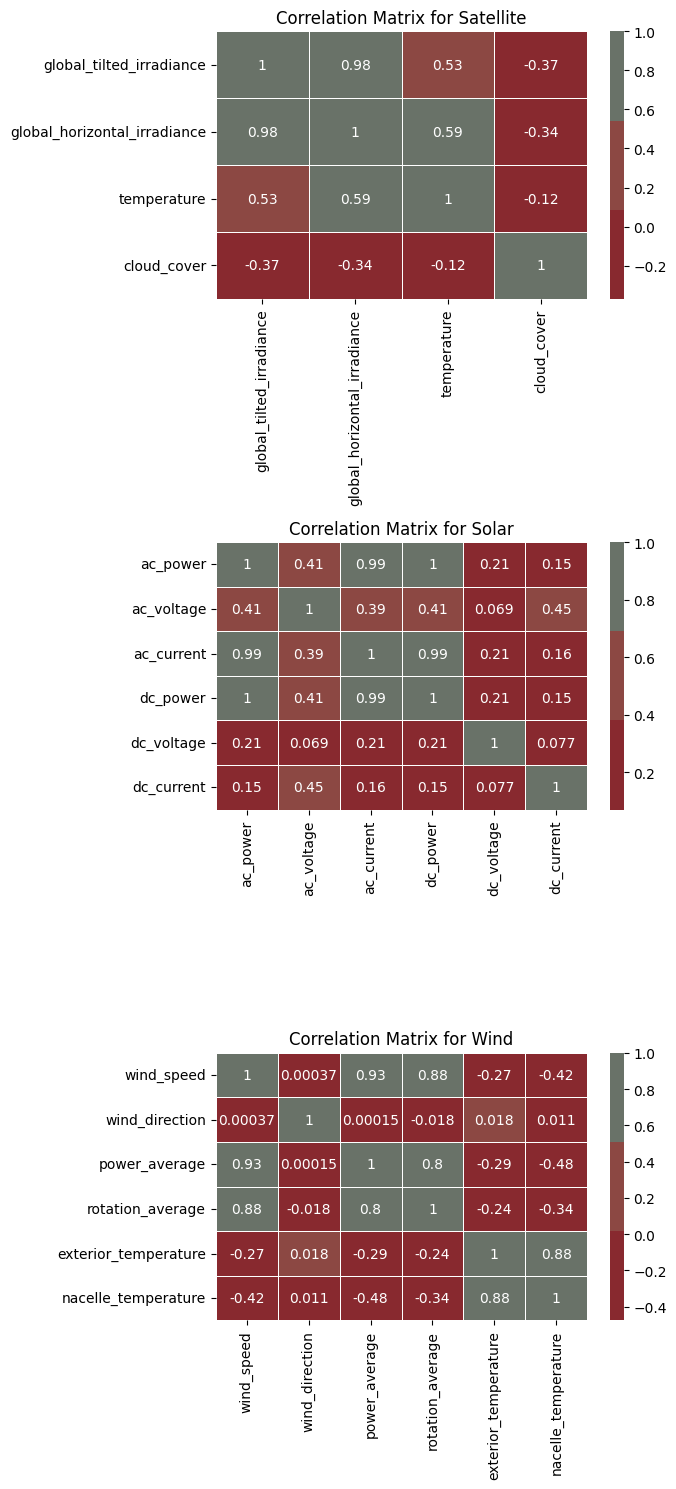

In [86]:
# Calculate the correlation matrix
my_colors = ['#88292F', '#8C4843', '#697268']
sns.set_palette(my_colors)

corr_matrix_dict = {}

for key, value in filtered_dfs_dict.items():
    corr_matrix = value.corr()
    corr_matrix_dict[key] = corr_matrix

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(7, 15))

plot = 1
for key, corr in corr_matrix_dict.items():
    plt.subplot(3, 1, plot)
    sns.heatmap(corr, annot=True, cmap=my_colors, linewidths=0.5)
    plt.title(f'Correlation Matrix for {key}')
    plot += 1
plt.tight_layout()
plt.show()

For Solar: makes sense to explore dc voltage vs dc current, because they have low correlation between them, so they give different knowledge. 

Doesn't make sense to explore dc variables against ac variables because dc gives information about the inverter (what actually matters) and ac about the grid.

For Wind: explore wind speed vs power average;

Also explore wind exterior temperature vs power average

NOTE: A nacelle is a cover housing that houses all of the generating components in a wind turbine, including the generator, gearbox, drive train, and brake assembly.

### Explore relationships between data variables 
#### and 
### Check outliers

In [69]:
# filtered_satellite_df = filtered_dfs_dict["Satellite"]
# filtered_solar_df = filtered_dfs_dict["Solar"]
# filtered_wind_df = filtered_dfs_dict["Wind"]


Boxplots for the filtered Satellite df:


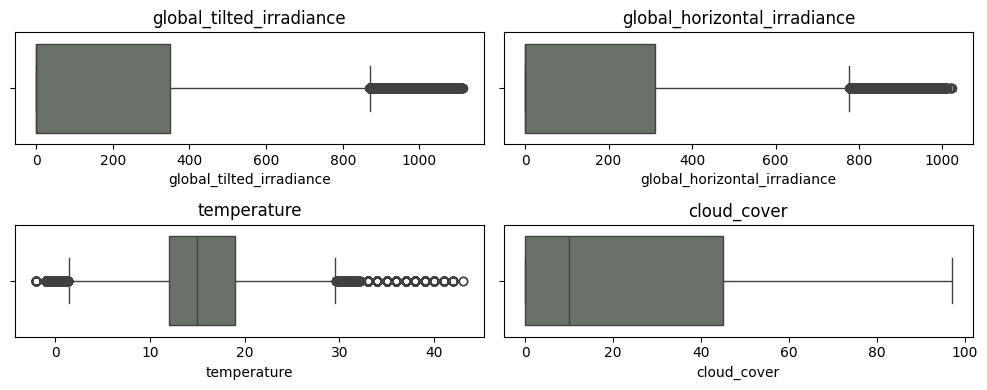


Boxplots for the filtered Solar df:


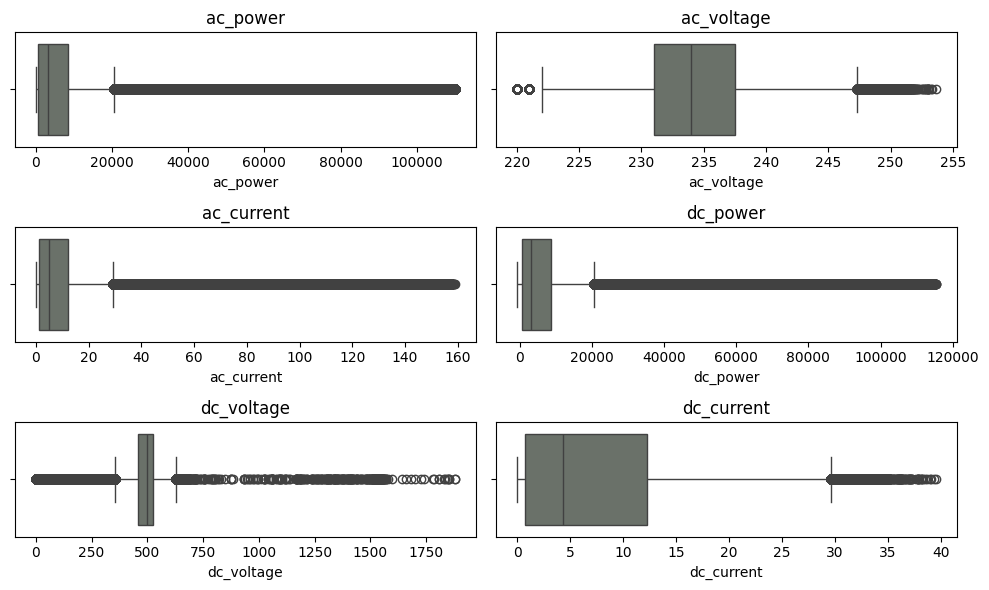


Boxplots for the filtered Wind df:


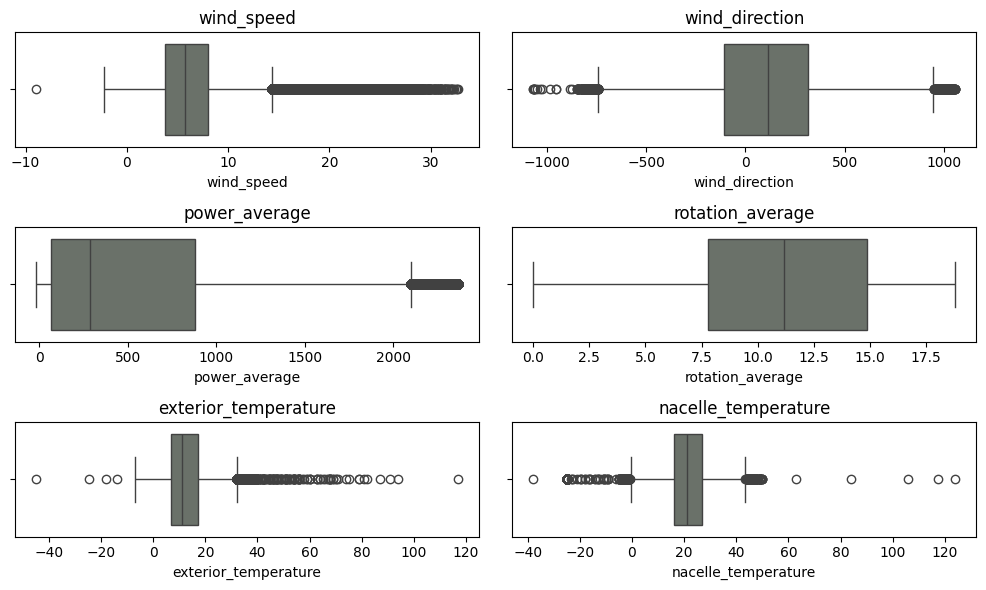

In [94]:

for key, value in filtered_dfs_dict.items():
    print(f"\nBoxplots for the filtered {key} df:")
    num_cols = len(value.columns)
    num_rows = (num_cols + 1) // 2  
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows*2))

    axes = axes.flatten()
    
    for i, feature in enumerate(value.columns):
        if i < num_cols:  
            sns.boxplot(x=value[feature], color='#697268', ax=axes[i])
            axes[i].set_title(feature)  
    plt.tight_layout() 
    plt.show()


However it seems to exist multiple outliers, this variables don't have "limits" or values that are more common than others (except maybe the ac_voltage), so we'll have to check for outliers in another way